In [19]:
!pip install -U scikit-fuzzy

     ---------------------------------------- 0.0/994.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/994.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/994.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/994.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/994.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/994.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/994.0 kB ? eta -:--:--
     -- ---------------------------------- 61.4/994.0 kB 156.1 kB/s eta 0:00:06
     --- --------------------------------- 92.2/994.0 kB 227.6 kB/s eta 0:00:04
     --- --------------------------------- 92.2/994.0 kB 227.6 kB/s eta 0:00:04
     ---- ------------------------------- 112.6/994.0 kB 226.0 kB/s eta 0:00:04
     ---- ------------------------------- 112.6/994.0 kB 226.0 kB/s eta 0:00:04
     ---- ------------------------------- 112.6/994.0 kB 226.0 kB/s eta 0:00:04
   

In [20]:
import os
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from skimage.io import imread
from skimage.transform import resize
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [21]:
# Fungsi untuk mengambil daftar file gambar dari direktori
def get_image_files(directory):
    image_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith((".jpg", ".jpeg", ".png")):
                image_files.append(os.path.join(root, file))
    return image_files

In [22]:
# Fungsi untuk meng-load dan mengubah gambar menjadi data numerik
def load_and_preprocess_images(image_files, target_size=(100, 100)):  # Tambahkan parameter target_size
    images_data = []
    for img_file in image_files:
        img = imread(img_file)
        if img is not None:
            # Resize gambar menjadi ukuran tertentu jika diperlukan
            img = resize(img, target_size)  # Resize gambar ke ukuran target
            images_data.append(img.flatten())  # Flatten gambar ke dalam satu dimensi
    return np.array(images_data)

In [23]:
# Load dataset gambar dari direktori tertentu
image_directory = "C:\\Users\\MSI GF63\\OneDrive\\Documents\\Folder Tugas\\SEMESTER 5\\MFDS\\Pertemuan 1\\mfds_data"
image_files = get_image_files(image_directory)
image_data = load_and_preprocess_images(image_files)

In [24]:
# Mendapatkan jumlah kelas (class) dari dataset gambar
num_classes = len(os.listdir(image_directory))
print(num_classes)

8


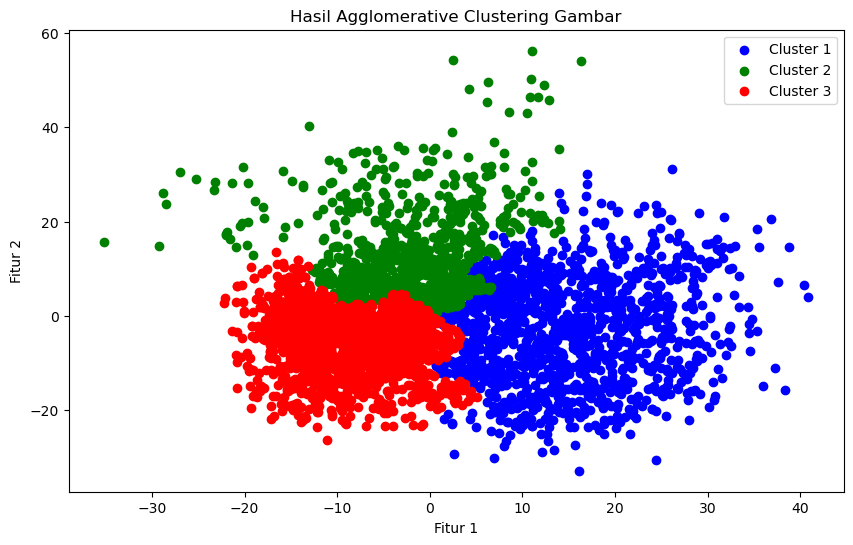

In [25]:
# Mengubah daftar fitur menjadi numpy array
X = np.array(image_data)

# Menggunakan PCA untuk mereduksi dimensi fitur jika diperlukan
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Menggunakan Agglomerative Clustering
n_clusters = 3  # Jumlah klaster yang diinginkan
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clustering.fit(X_pca)

# Menampilkan hasil klaster
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for cluster_id in range(n_clusters):
    cluster_points = X_pca[clustering.labels_ == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[cluster_id], label=f'Cluster {cluster_id+1}')

plt.title('Hasil Agglomerative Clustering Gambar')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend()
plt.show()

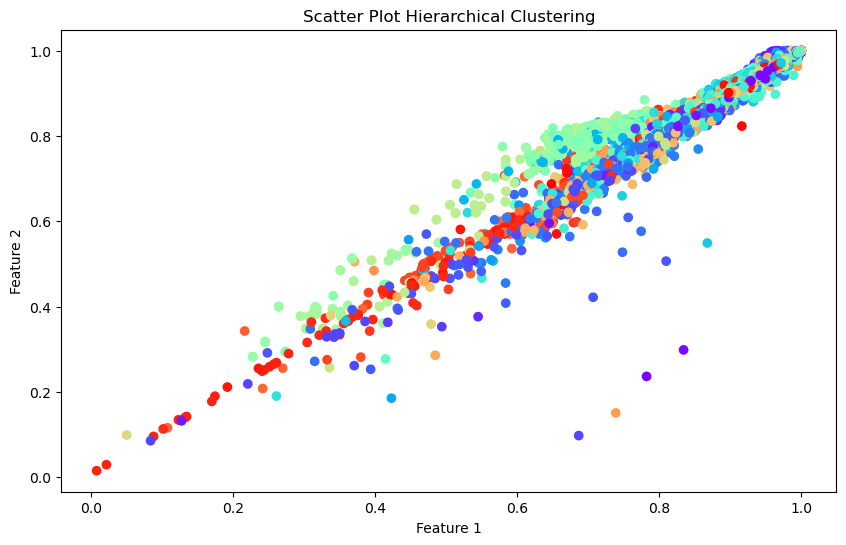

In [37]:
# Membuat linkage matrix dengan metode 'ward'
linkage_matrix = linkage(image_data, method='ward')

# Ganti nilai treshold sesuai kebutuhan Anda untuk membentuk klaster
labels = fcluster(linkage_matrix, t=10, criterion='distance')

# Menampilkan hasil klastering dalam bentuk scatter plot (contoh)
plt.figure(figsize=(10, 6))
plt.scatter(image_data[:, 0], image_data[:, 1], c=labels, cmap='rainbow')
plt.title('Scatter Plot Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [40]:
import timeit

# Fungsi untuk melakukan klastering K-Means
def perform_agglomerative_clustering():
    linkage_matrix = linkage(image_data, method='ward')
    agglomerative = AgglomerativeClustering(n_clusters=num_classes, linkage='ward')
    agglomerative_labels = agglomerative.fit_predict(image_data)

# Fungsi untuk melakukan klastering Hierarchical Clustering
def perform_hierarchical_clustering():
    linkage_matrix = linkage(image_data, method='ward')
    threshold = num_classes - 1
    hierarchical_labels = fcluster(linkage_matrix, threshold, criterion='distance')

# Data Anda (image_data) harus dalam bentuk matriks numpy
# image_data = ...

# Jumlah klaster yang diinginkan
num_classes = 3

# Mengukur runtime klastering K-Means
agglomerative_runtime = timeit.timeit(perform_agglomerative_clustering, number=1)

# Mengukur runtime klastering Hierarchical Clustering
hierarchical_runtime = timeit.timeit(perform_hierarchical_clustering, number=1)

print(f"Runtime Agglomerative Clustering: {agglomerative_runtime} detik")
print(f"Runtime Hierarchical Clustering: {hierarchical_runtime} detik")

Runtime Agglomerative Clustering: 325.42140169999766 detik
Runtime Hierarchical Clustering: 165.51474230000167 detik


In [43]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Fungsi untuk mengukur kualitas klastering dengan metrik tertentu
def evaluate_clustering_metrics(labels_true, labels_pred, data):
    silhouette = silhouette_score(data, labels_pred)
    davies_bouldin = davies_bouldin_score(data, labels_pred)
    calinski_harabasz = calinski_harabasz_score(data, labels_pred)
    return silhouette, davies_bouldin, calinski_harabasz

# Mengukur kualitas klastering dengan metrik
silhouette_agglomerative, davies_bouldin_agglomerative, calinski_harabasz_agglomerative = evaluate_clustering_metrics(labels, kmeans_labels, image_data)
silhouette_hierarchical, davies_bouldin_hierarchical, calinski_harabasz_hierarchical = evaluate_clustering_metrics(labels, hierarchical_labels, image_data)

# Menampilkan hasil perbandingan
print("Perbandingan Agglomerative Clustering:")
print(f"Silhouette Score: {silhouette_agglomerative}")
print(f"Davies-Bouldin Index: {davies_bouldin_agglomerative}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_agglomerative}")

print("\nPerbandingan Hierarchical Clustering:")
print(f"Silhouette Score: {silhouette_hierarchical}")
print(f"Davies-Bouldin Index: {davies_bouldin_hierarchical}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_hierarchical}")


NameError: name 'hierarchical_labels' is not defined